In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
height=[167,145,170,180,189,155,163,178,173,176]
weight=[83.5,72.5,85,90,94.5,77.5,81.5,89,86.5,88]
data=pd.DataFrame(list(zip(height,weight)),columns=["height","weight"])
data

,height,weight
0,167,83.5
1,145,72.5
2,170,85.0
3,180,90.0
4,189,94.5
5,155,77.5
6,163,81.5
7,178,89.0
8,173,86.5
9,176,88.0


In [14]:
x=data["height"]
y=data["weight"]

In [15]:
#cost function 
def single_point_cost(x,y,w):   
    y_pred= w * x
    cost=( y_pred - y) **2  #linear regression
    return cost

In [16]:
#grad function
def grad(x,y,w,):
    grad_w=2 * x * ((w * x) - y ) # derevative with respect to x
    return grad_w

# Batch gd or regular gradient descent

In [17]:
w=0 # here we have  only one parameter
gamma=0.000001 #learning rate
all_costs=[]
for k in range(60):
    cost=0
    for i in range(len(x)):
        a=single_point_cost(x[i],y[i],w)
        cost+=a
    
    cost1=cost/len(x)  #average cost
    all_costs.append(cost1)
    grad_w=0
    for j in range(len(x)):
        b=grad(x[j],y[j],w)
        grad_w+=b
    grad_w1=grad_w/len(x)  #avearge grad
    w= w -  (gamma * grad_w1)  # in batch gradient descent update happens only one time


In [18]:
w #optimal value of w

0.48597498598079936

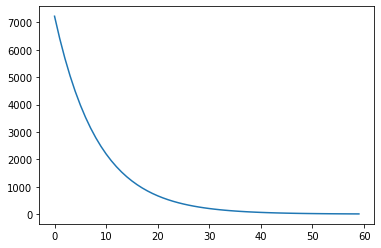

In [19]:
epochs=np.arange(60)
plt.plot(epochs,all_costs)

# stochatic gradient descent

In [20]:
all_costs23=[]
w=0
gamma=0.000001
for k in range(60):
    for i in range(len(x)):
        cost21=single_point_cost(x[i],y[i],w)
        grad_w21=grad(x[i],y[i],w)
        w= w- (gamma * grad_w21) # in sgd update takes place after every point
    all_costs23.append(cost21)

In [21]:
w

0.4999999999999996

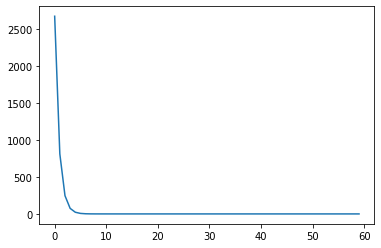

In [22]:
s1=np.arange(60)
plt.plot(epochs,all_costs23)

# mini batch gradient descent

In [23]:
# let our batch size = 5
#so we will have 2 batches because n=10  and updates will happen 2 times 
w=0
gamma=0.000001
batch_size= 5
all_costs41=[]
for k in range(60):
    for j in range(int(len(x)/batch_size)):
        cost4=0
        for i in range(batch_size):
            z1=single_point_cost(x[i],y[i],w)
            cost4+=z1
        if j==1:
            all_costs41.append(cost4/batch_size) #avearge cost of that batch
        grad_w41=0
        for n in range(batch_size):
            f1=grad(x[i],y[i],w)
            grad_w41+=f1
    
        grad_w42=grad_w41/batch_size  #average grad of that function

        w= w- (gamma * grad_w42)  # update takes place after every batch

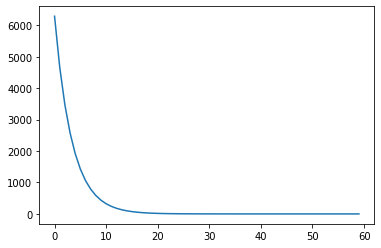

In [24]:
plt.plot(epochs,all_costs41)

# comparison all variants of gardeint descent

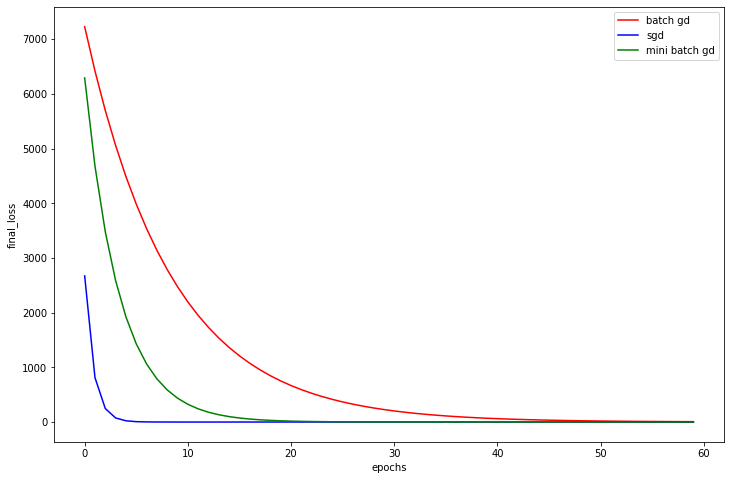

In [25]:
plt.figure(figsize=(12,8))
plt.plot(epochs,all_costs,c='r',label="batch gd")
plt.plot(epochs,all_costs23,c='b',label="sgd")
plt.plot(epochs,all_costs41,c='g',label="mini batch gd")
plt.xlabel("epochs")
plt.ylabel("final_loss")
plt.legend()
plt.show()